In [18]:
%load_ext autoreload
%autoreload 2
from scipy.stats import shapiro, ttest_rel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from hmpai.visualization import plot_performance, plot_performance_from_file, generate_table
import json
from pathlib import Path
from collections import defaultdict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Normalization RNN


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Dummy & 91.46 (SD 2.78) & 91.42 (SD 2.82) \\
  0 to 1 & 92.82 (SD 2.58) & 92.82 (SD 2.56) \\
  -1 to 1 & 93.47 (SD 2.01) & 93.46 (SD 2.01) \\
  Z-Score & 93.38 (SD 2.17) & 93.38 (SD 2.16) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
  category    metric      value
0    Dummy  Accuracy  91.457456
1   0 to 1  Accuracy  92.824673
2  -1 to 1  Accuracy  93.473672
3  Z-Score  Accuracy  93.380051
4    Dummy  F1-score  91.420425
5   0 to 1  F1-score  92.821974
6  -1 to 1  F1-score  93.456275
7  Z-Score  F1-score  93.380579


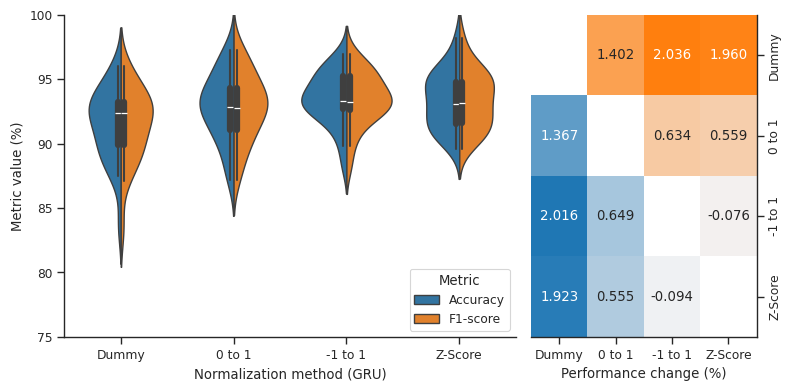

In [11]:
norm_paths = [
    Path("../logs/exp_normalization_gru/results_norm_dummy.json"),
    Path("../logs/exp_normalization_gru/results_norm_0_to_1.json"),
    Path("../logs/exp_normalization_gru/results_norm_min1_to_1.json"),
    Path("../logs/exp_normalization_gru/results_norm_zscore.json"),
]
conditions = ["Dummy", "0 to 1", "-1 to 1", "Z-Score"]
plot_performance_from_file(
    norm_paths,
    conditions,
    "Normalization method (GRU)",
    do_generate_table=True,
    ylim=(75, 100),
)

### Normalization CNN


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Dummy & 89.86 (SD 2.54) & 89.84 (SD 2.57) \\
  0 to 1 & 83.29 (SD 5.10) & 83.18 (SD 5.23) \\
  -1 to 1 & 91.26 (SD 2.38) & 91.25 (SD 2.39) \\
  Z-Score & 90.50 (SD 2.79) & 90.48 (SD 2.80) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
  category    metric      value
0    Dummy  Accuracy  89.857515
1   0 to 1  Accuracy  83.288209
2  -1 to 1  Accuracy  91.262946
3  Z-Score  Accuracy  90.501619
4    Dummy  F1-score  89.842653
5   0 to 1  F1-score  83.182316
6  -1 to 1  F1-score  91.253028
7  Z-Score  F1-score  90.484592


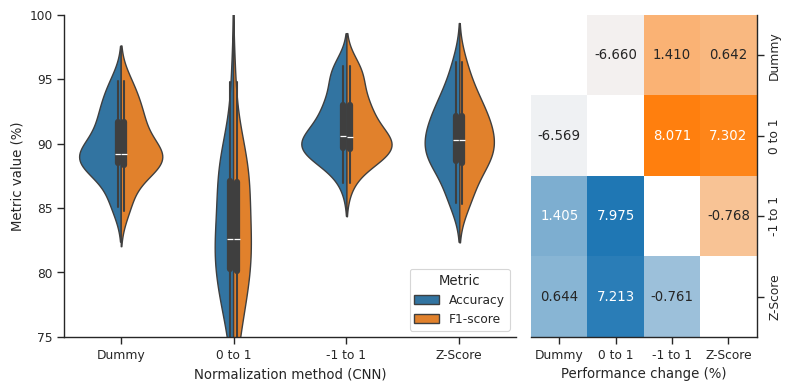

In [10]:
norm_paths = [
    Path("../logs/exp_normalization_cnn/results_norm_dummy.json"),
    Path("../logs/exp_normalization_cnn/results_norm_0_to_1.json"),
    Path("../logs/exp_normalization_cnn/results_norm_min1_to_1.json"),
    Path("../logs/exp_normalization_cnn/results_norm_zscore.json"),
]
conditions = ["Dummy", "0 to 1", "-1 to 1", "Z-Score"]
plot_performance_from_file(
    norm_paths,
    conditions,
    "Normalization method (CNN)",
    do_generate_table=True,
    ylim=(75, 100),
)

### Performance SAT1 500 Hz


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  RF & 66.03 (SD 7.34) & 65.02 (SD 8.06) \\
  SVC & 69.72 (SD 5.91) & 69.03 (SD 6.52) \\
  CNN & 88.11 (SD 5.82) & 88.12 (SD 5.77) \\
  GRU & 91.73 (SD 3.55) & 91.72 (SD 3.54) \\
  Transformer & 76.44 (SD 7.66) & 76.26 (SD 7.82) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
      category    metric      value
0           RF  Accuracy  66.028381
1          SVC  Accuracy  69.722061
2          CNN  Accuracy  88.111914
3          GRU  Accuracy  91.734178
4  Transformer  Accuracy  76.439491
5           RF  F1-score  65.015557
6          SVC  F1-score  69.026741
7          CNN  F1-score  88.120393
8          GRU  F1-score  91.724567
9  Transformer  F1-score  76.261223


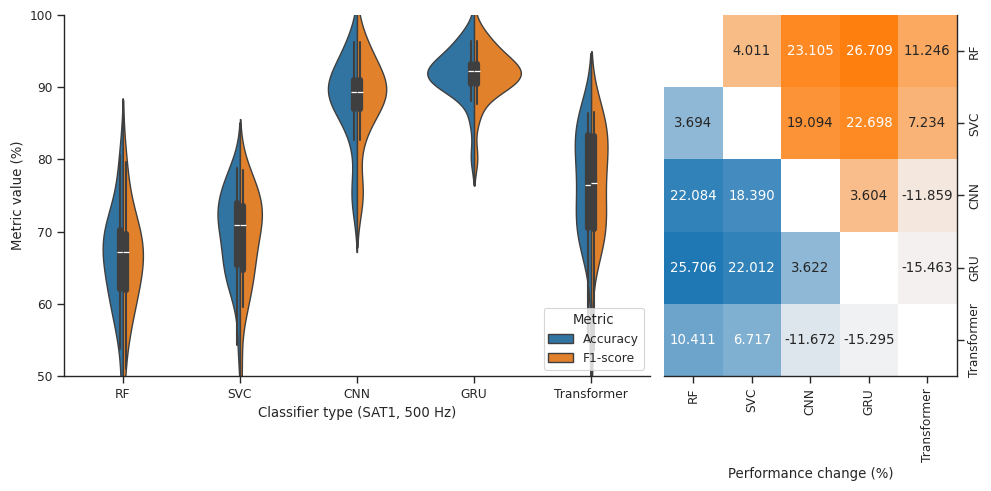

In [8]:
perf_sat1_500_base = Path("../logs/exp_performance_sat1_500hz/")
perf_sat1_500_paths = [
    perf_sat1_500_base / "results_RandomForestClassifier.json",
    perf_sat1_500_base / "results_SVC.json",
    perf_sat1_500_base / "results_SAT1Deep.json",
    perf_sat1_500_base / "results_SAT1GRU.json",
    perf_sat1_500_base / "results_TransformerModel.json",
]
conditions = ["RF", "SVC", "CNN", "GRU", "Transformer"]
plot_performance_from_file(
    perf_sat1_500_paths,
    conditions=conditions,
    cat_name="Classifier type (SAT1, 500 Hz)",
    do_generate_table=True,
    ylim=(50, 100),
)

### Performance SAT2 100 Hz


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  RF & 68.57 (SD 3.14) & 66.51 (SD 3.41) \\
  SVC & 76.48 (SD 2.49) & 74.95 (SD 3.04) \\
  CNN & 90.18 (SD 2.74) & 90.21 (SD 2.77) \\
  GRU & 91.14 (SD 2.29) & 91.13 (SD 2.29) \\
  Transformer & 86.39 (SD 4.43) & 86.19 (SD 4.78) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
      category    metric      value
0           RF  Accuracy  68.568281
1          SVC  Accuracy  76.476366
2          CNN  Accuracy  90.176011
3          GRU  Accuracy  91.136926
4  Transformer  Accuracy  86.393724
5           RF  F1-score  66.509453
6          SVC  F1-score  74.947576
7          CNN  F1-score  90.207659
8          GRU  F1-score  91.132791
9  Transformer  F1-score  86.187447


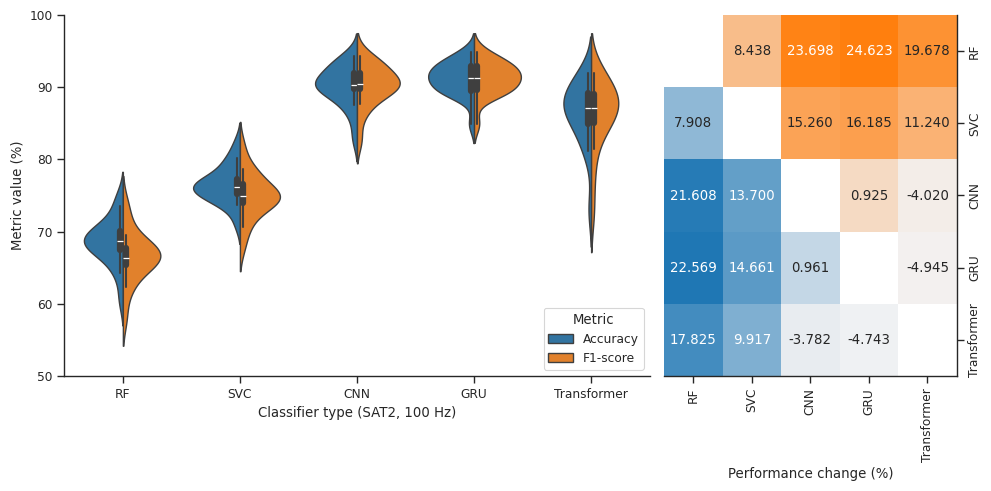

In [7]:
perf_sat2_100_base = Path("../logs/exp_performance_sat2_100hz/")
perf_sat2_100_paths = [
    perf_sat2_100_base / "results_RandomForestClassifier.json",
    perf_sat2_100_base / "results_SVC.json",
    perf_sat2_100_base / "results_SAT1Base.json",
    perf_sat2_100_base / "results_SAT1GRU.json",
    perf_sat2_100_base / "results_TransformerModel.json",
]
conditions = ["RF", "SVC", "CNN", "GRU", "Transformer"]
plot_performance_from_file(
    perf_sat2_100_paths,
    conditions=conditions,
    cat_name="Classifier type (SAT2, 100 Hz)",
    do_generate_table=True,
    ylim=(50, 100),
)

### Data formulation

In [3]:
form_path_base = Path("../logs/exp_formulation/results_formulation-base_fold25.json")
form_path_topological_noconv = Path(
    "../logs/exp_formulation/results_formulation-topological-noconv_fold25.json"
)
form_path_topological = Path(
    "../logs/exp_formulation/results_formulation-topological_fold25.json"
)

conditions = ["Control", "Topo", "Topo+Conv"]


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Control & 88.23 (SD 3.18) & 88.20 (SD 3.15) \\
  Topo & 88.14 (SD 3.49) & 88.09 (SD 3.46) \\
  Topo+Conv & 87.06 (SD 3.50) & 87.03 (SD 3.42) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
    category    metric      value
0    Control  Accuracy  88.231048
1       Topo  Accuracy  88.143679
2  Topo+Conv  Accuracy  87.057379
3    Control  F1-score  88.203130
4       Topo  F1-score  88.093767
5  Topo+Conv  F1-score  87.031583


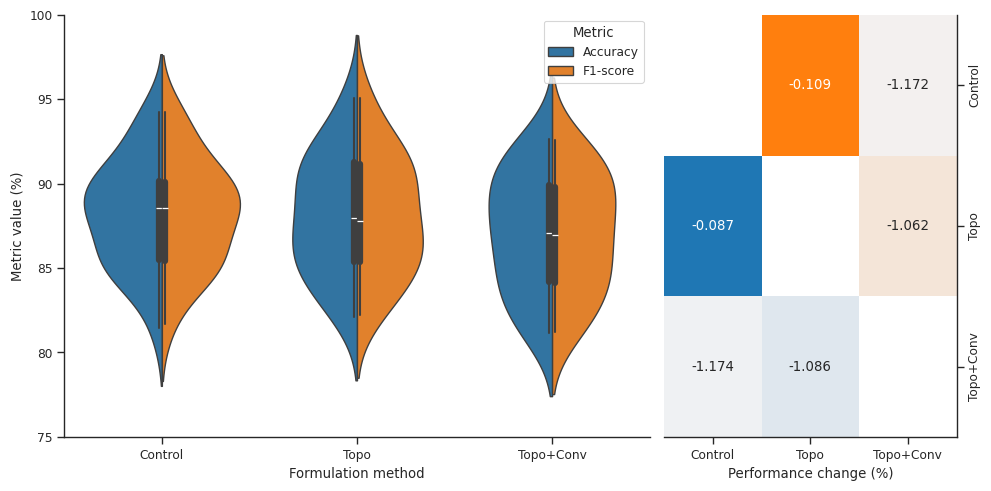

In [4]:
plot_performance_from_file(
    [form_path_base, form_path_topological_noconv, form_path_topological],
    conditions,
    "Formulation method",
    do_generate_table=True,
    legend_pos="upper right",
    ylim=(75, 100),
)

### Generalization across Dataset

In [19]:
base_path = Path("../logs/exp_generalization_datasets/results_SAT1Base.json")
gru_path = Path("../logs/exp_generalization_datasets/results_SAT1GRU.json")
transformer_path = Path(
    "../logs/exp_generalization_datasets/results_TransformerModel.json"
)

# Swap SAT2 and SAT1 if model is trained on SAT2 (Bigger)
# conditions = ["SAT1", "SAT2", "AR"]
conditions = ["SAT2", "SAT1", "AR"]

[57.68115942028985, 58.118398427904694, 66.0132645541636, 58.95848685826578, 61.002210759027264, 63.62073200687792, 68.44018668631786, 65.41390321788259, 62.60869565217392, 60.94816998280521, 67.52640628838124, 65.379513633014, 63.7484647506755, 29.43257184966839, 64.5246868091378, 59.5725865880619, 60.05404077622206, 67.1530336526652]
[57.68115942028985, 58.118398427904694, 66.0132645541636, 58.95848685826578, 61.002210759027264, 63.62073200687792, 68.44018668631786, 65.41390321788259, 62.60869565217392, 60.94816998280521, 67.52640628838124, 65.379513633014, 63.7484647506755, 29.43257184966839, 64.5246868091378, 59.5725865880619, 60.05404077622206, 67.1530336526652]

\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  SAT2 & 90.50\% (SD 2.49) & 90.51\% (SD 2.50) \\
  SAT1 & 61.12\% (SD 8.34) & 60.12\% (SD 8.97) \\
  AR & 16.48\% (SD 4.32) & 13.59\% (SD 3.78) \\ \bottomrule
  \end{tabular}
  \caption{CAPT

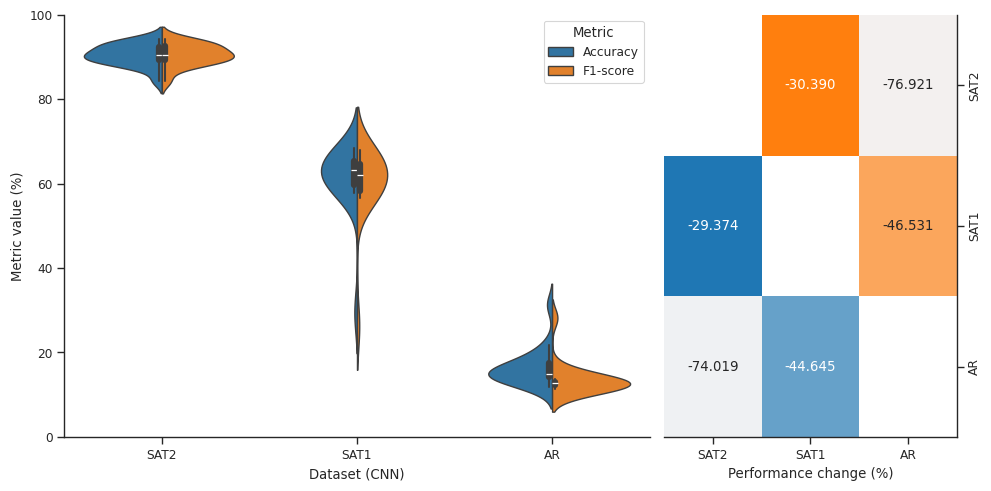

In [24]:
res = plot_performance_from_file(
    base_path,
    conditions,
    "Dataset (CNN)",
    do_generate_table=True,
    legend_pos="upper right",
)


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  SAT2 & 91.17\% (SD 2.21) & 91.18\% (SD 2.22) \\
  SAT1 & 60.96\% (SD 2.00) & 60.61\% (SD 1.71) \\
  AR & 23.46\% (SD 1.73) & 21.87\% (SD 1.55) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
  category    metric      value
0     SAT2  Accuracy  91.174594
1     SAT1  Accuracy  59.199487
2       AR  Accuracy  23.456491
3     SAT2  F1-score  91.178711
4     SAT1  F1-score  58.634527
5       AR  F1-score  21.871839


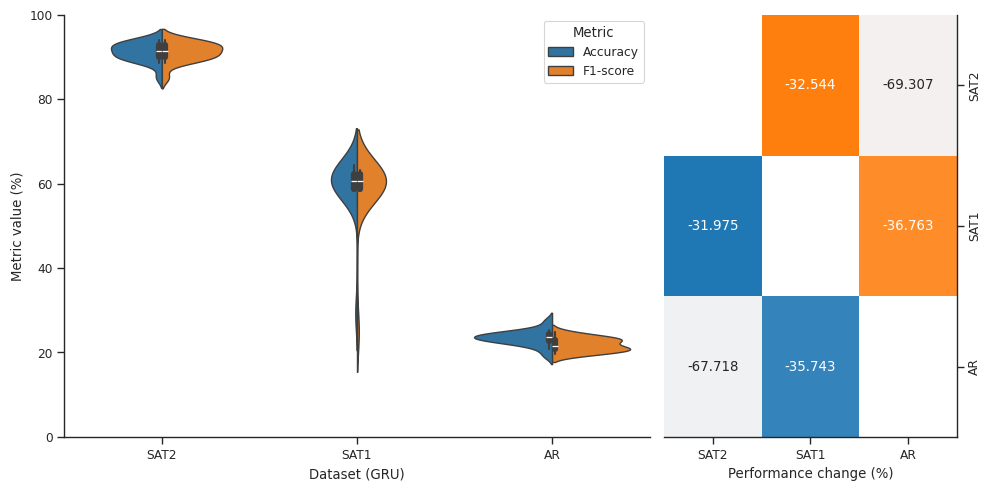

In [17]:
res = plot_performance_from_file(
    gru_path,
    conditions,
    "Dataset (GRU)",
    do_generate_table=True,
    legend_pos="upper right",
)

In [6]:
res

defaultdict(<function hmpai.visualization.plot_performance_from_file.<locals>.<lambda>()>,
            {'SAT2': defaultdict(list,
                         {'accuracy': [91.69012498592501,
                           90.55613850996852,
                           90.48866498740554,
                           91.04276690483587,
                           88.59605170858804,
                           92.66045758250658,
                           93.10423564333828,
                           90.08018327605957,
                           89.31948051948052,
                           89.08366533864542,
                           85.23109615725164,
                           92.79334770557438,
                           93.86977024179794,
                           93.87258043840532,
                           94.08423534455042,
                           90.02041279201633,
                           92.61561954624781,
                           92.03385899814471],
                          'f1


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  SAT2 & 86.26 (SD 3.56) & 86.16 (SD 3.73) \\
  SAT1 & 49.13 (SD 8.66) & 46.25 (SD 10.67) \\
  AR & 20.93 (SD 4.10) & 22.03 (SD 2.72) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
  category    metric      value
0     SAT2  Accuracy  86.264749
1     SAT1  Accuracy  49.127978
2       AR  Accuracy  20.926155
3     SAT2  F1-score  86.155849
4     SAT1  F1-score  46.248469
5       AR  F1-score  22.026926


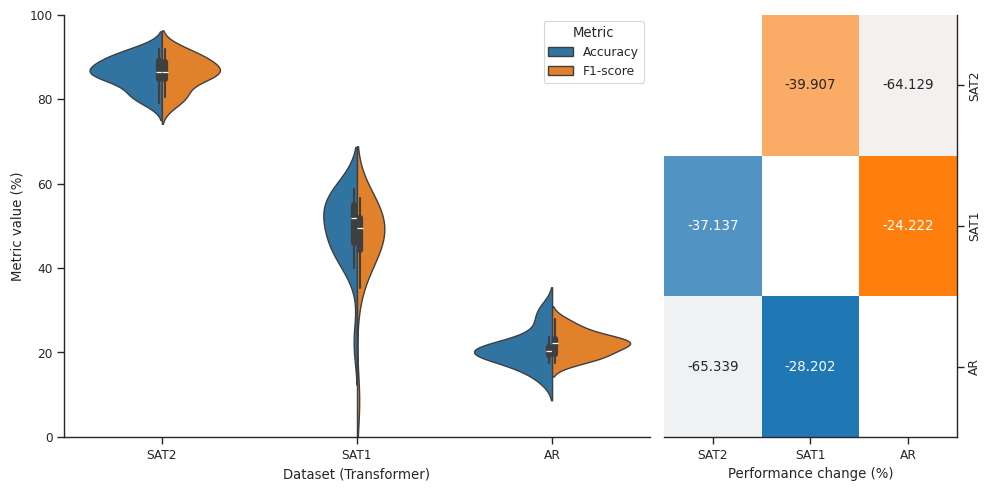

In [9]:
plot_performance_from_file(
    transformer_path,
    conditions,
    "Dataset (Transformer)",
    do_generate_table=True,
    legend_pos="upper right",
)

### Generalization across condition

In [10]:
cond_path_base = Path("../logs/exp_generalization_condition/results_SAT1Base.json")
cond_path_gru = Path("../logs/exp_generalization_condition/results_SAT1GRU.json")
cond_path_transformer = Path(
    "../logs/exp_generalization_condition/results_TransformerModel.json"
)

conditions = ["Accuracy", "Speed"]


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Accuracy & 89.85\% (SD 2.82) & 89.83\% (SD 2.83) \\
  Speed & 85.53\% (SD 19.66) & 85.92\% (SD 20.67) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
   category    metric      value
0  Accuracy  Accuracy  89.850250
1     Speed  Accuracy  85.528616
2  Accuracy  F1-score  89.833499
3     Speed  F1-score  85.921949


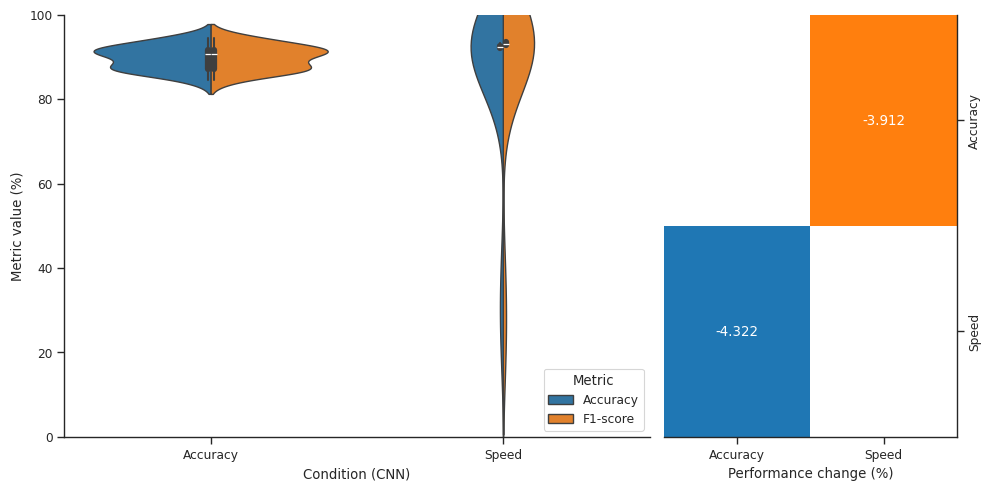

In [11]:
res = plot_performance_from_file(
    cond_path_base, conditions, "Condition (CNN)", do_generate_table=True
)

In [12]:
res

defaultdict(<function hmpai.visualization.plot_performance_from_file.<locals>.<lambda>()>,
            {'Accuracy': defaultdict(list,
                         {'accuracy': [88.74900079936052,
                           91.06973209196276,
                           91.22304903644343,
                           88.14964983413196,
                           87.10398807305255,
                           90.53645636569702,
                           91.69625246548323,
                           86.39870077141697,
                           87.06458294106571,
                           87.30802047781569,
                           84.5193929173693,
                           94.0154804606381,
                           93.37304542069992,
                           91.61142857142856,
                           94.55194439226,
                           91.1491935483871,
                           91.89303011160244,
                           86.89155535431287],
                          'f1':


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Accuracy & 89.94 (SD 4.46) & 89.92 (SD 4.49) \\
  Speed & 88.69 (SD 10.77) & 89.74 (SD 9.67) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
   category    metric      value
0  Accuracy  Accuracy  89.936626
1     Speed  Accuracy  88.685410
2  Accuracy  F1-score  89.916575
3     Speed  F1-score  89.736584


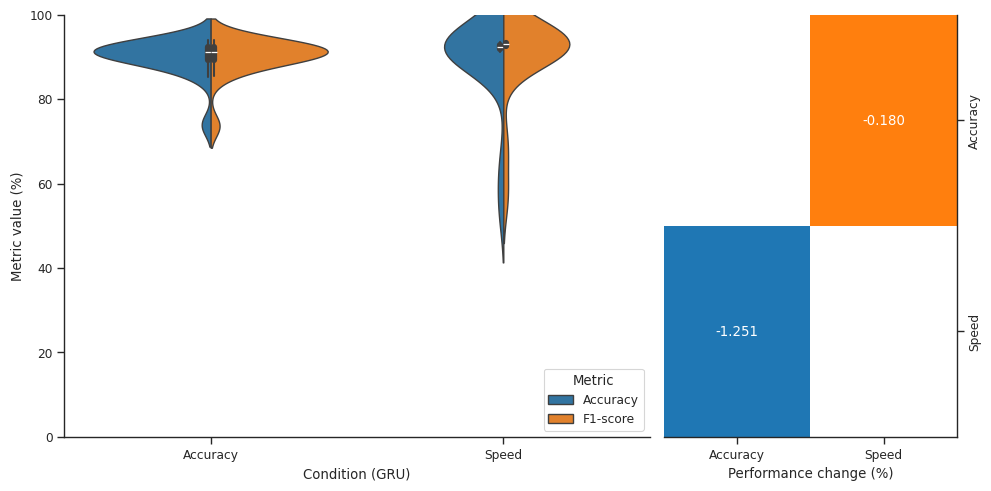

In [12]:
plot_performance_from_file(
    cond_path_gru, conditions, "Condition (GRU)", do_generate_table=True
)


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Accuracy & 86.22 (SD 5.22) & 85.77 (SD 6.57) \\
  Speed & 84.63 (SD 20.07) & 86.04 (SD 20.33) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
   category    metric      value
0  Accuracy  Accuracy  86.217672
1     Speed  Accuracy  84.630155
2  Accuracy  F1-score  85.769259
3     Speed  F1-score  86.043753


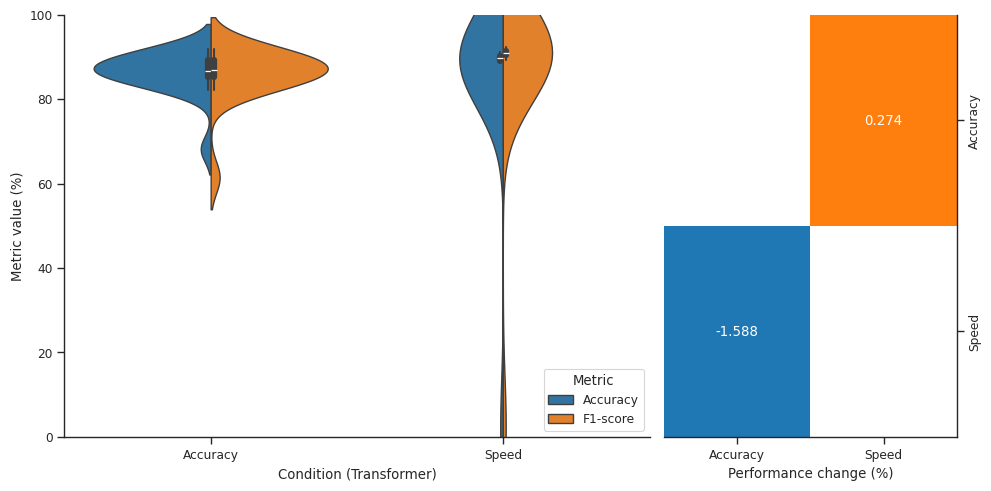

In [13]:
plot_performance_from_file(
    cond_path_transformer, conditions, "Condition (Transformer)", do_generate_table=True
)

#### Normality test

In [2]:
accs = [
    0.9193548387096774,
    0.9121540312876053,
    0.9324644549763034,
    0.836627140974967,
    0.9248768472906403,
    0.8748466257668711,
    0.9042690815006468,
    0.9038238702201622,
    0.9471830985915493,
    0.879245283018868,
    0.9549436795994993,
    0.9286592865928659,
    0.8991793669402111,
    0.8837535014005602,
    0.9428223844282239,
    0.9404761904761905,
    0.9235436893203883,
    0.9288256227758007,
    0.9601449275362319,
    0.8938271604938272,
    0.933420365535248,
    0.925700365408039,
    0.9255813953488372,
    0.8993464052287582,
    0.889294403892944,
]

f1s = [
    0.9189590478638655,
    0.9025428860739405,
    0.9297394289290478,
    0.836697914316906,
    0.9241266291884175,
    0.8784285148394029,
    0.9057057119524584,
    0.8921159676082195,
    0.9426972513106886,
    0.8758293413566214,
    0.9549060528176925,
    0.9309728717346563,
    0.9012248386433083,
    0.8848582287889718,
    0.9392833456687871,
    0.9390455145945186,
    0.9198482926913684,
    0.9265422288805676,
    0.9598112263179928,
    0.8968477639025977,
    0.9320553452096181,
    0.9251131491025688,
    0.9240732870736009,
    0.8950677656979513,
    0.8878237386847555,
]

In [3]:
print(shapiro(accs))
print(shapiro(f1s))

ShapiroResult(statistic=0.958040177822113, pvalue=0.3768245577812195)
ShapiroResult(statistic=0.9596362709999084, pvalue=0.40727755427360535)


#### Normalization

In [2]:
norm_accs = []
norm_f1s = []

# norm_dummy
norm_accs.append(
    [
        0.9193548387096774,
        0.9121540312876053,
        0.9324644549763034,
        0.836627140974967,
        0.9248768472906403,
        0.8748466257668711,
        0.9042690815006468,
        0.9038238702201622,
        0.9471830985915493,
        0.879245283018868,
        0.9549436795994993,
        0.9286592865928659,
        0.8991793669402111,
        0.8837535014005602,
        0.9428223844282239,
        0.9404761904761905,
        0.9235436893203883,
        0.9288256227758007,
        0.9601449275362319,
        0.8938271604938272,
        0.933420365535248,
        0.925700365408039,
        0.9255813953488372,
        0.8993464052287582,
        0.889294403892944,
    ]
)
norm_f1s.append(
    [
        0.9189590478638655,
        0.9025428860739405,
        0.9297394289290478,
        0.836697914316906,
        0.9241266291884175,
        0.8784285148394029,
        0.9057057119524584,
        0.8921159676082195,
        0.9426972513106886,
        0.8758293413566214,
        0.9549060528176925,
        0.9309728717346563,
        0.9012248386433083,
        0.8848582287889718,
        0.9392833456687871,
        0.9390455145945186,
        0.9198482926913684,
        0.9265422288805676,
        0.9598112263179928,
        0.8968477639025977,
        0.9320553452096181,
        0.9251131491025688,
        0.9240732870736009,
        0.8950677656979513,
        0.8878237386847555,
    ]
)

# norm_0_to_1
norm_accs.append(
    [
        0.9366359447004609,
        0.9253910950661853,
        0.9016587677725119,
        0.8801054018445322,
        0.9421182266009852,
        0.905521472392638,
        0.890038809831824,
        0.9107763615295481,
        0.9730046948356808,
        0.8716981132075472,
        0.9499374217772215,
        0.923739237392374,
        0.9062133645955451,
        0.9159663865546218,
        0.9549878345498783,
        0.9619047619047619,
        0.9429611650485437,
        0.9323843416370107,
        0.9698067632850241,
        0.9382716049382716,
        0.9569190600522193,
        0.9269183922046285,
        0.9255813953488372,
        0.9281045751633987,
        0.9355231143552312,
    ]
)
norm_f1s.append(
    [
        0.9388138577179113,
        0.9215762706980462,
        0.8981059231558867,
        0.884737006464861,
        0.944838292409494,
        0.9105641839383976,
        0.8901215000207987,
        0.9044797537452703,
        0.9719041756480473,
        0.8677145290728262,
        0.950135653534734,
        0.9281297733507425,
        0.9100076302028193,
        0.9172604968101006,
        0.9556017208506077,
        0.9607118451666221,
        0.9435964349717182,
        0.9311366687539809,
        0.9695541013663018,
        0.9415732820059036,
        0.9543689821416572,
        0.9260994663591344,
        0.9202227583391351,
        0.9273401018395818,
        0.9355618456120685,
    ]
)

# norm_min1_to_1
norm_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)

norm_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)

# norm_zscore
norm_accs.append(
    [
        0.9262672811059908,
        0.9229843561973526,
        0.9478672985781991,
        0.8959156785243741,
        0.9470443349753694,
        0.905521472392638,
        0.9301423027166882,
        0.9073001158748552,
        0.9671361502347418,
        0.909433962264151,
        0.9586983729662077,
        0.939729397293973,
        0.9155920281359906,
        0.9103641456582633,
        0.9574209245742092,
        0.955952380952381,
        0.9453883495145631,
        0.9513641755634639,
        0.9818840579710145,
        0.9308641975308642,
        0.9477806788511749,
        0.9390986601705238,
        0.9255813953488372,
        0.9071895424836601,
        0.9184914841849149,
    ]
)
norm_f1s.append(
    [
        0.9262672811059908,
        0.9229843561973526,
        0.9478672985781991,
        0.8959156785243741,
        0.9470443349753694,
        0.905521472392638,
        0.9301423027166882,
        0.9073001158748552,
        0.9671361502347418,
        0.909433962264151,
        0.9586983729662077,
        0.939729397293973,
        0.9155920281359906,
        0.9103641456582633,
        0.9574209245742092,
        0.955952380952381,
        0.9453883495145631,
        0.9513641755634639,
        0.9818840579710145,
        0.9308641975308642,
        0.9477806788511749,
        0.9390986601705238,
        0.9255813953488372,
        0.9071895424836601,
        0.9184914841849149,
    ]
)


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Control & 0.91 (SD 0.03) & 0.91 (SD 0.03) \\
  0 to 1 & 0.93 (SD 0.03) & 0.93 (SD 0.03) \\
  -1 to 1 & 0.93 (SD 0.02) & 0.93 (SD 0.02) \\
  Z-score & 0.93 (SD 0.02) & 0.93 (SD 0.02) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
  category    metric     value
0  Control  Accuracy  0.914575
1   0 to 1  Accuracy  0.928247
2  -1 to 1  Accuracy  0.934737
3  Z-score  Accuracy  0.933801
4  Control  F1-score  0.912973
5   0 to 1  F1-score  0.928166
6  -1 to 1  F1-score  0.933941
7  Z-score  F1-score  0.933801


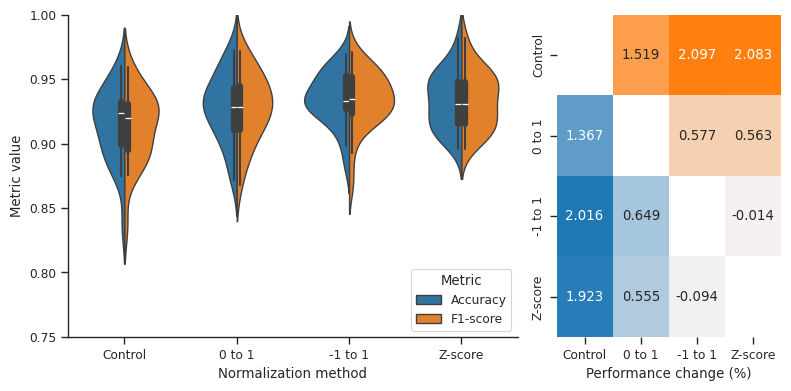

In [5]:
norm_cats = ["Control", "0 to 1", "-1 to 1", "Z-score"]
print(generate_table(norm_accs, norm_f1s, norm_cats))
df = plot_performance(
    norm_accs,
    norm_f1s,
    norm_cats,
    "Normalization method",
    ylim=(0.75, 1),
)

#### Preprocessing

In [21]:
pre_accs = []
pre_f1s = []

pre_categories = ["Control", "Unprocessed"]

# Control (processed)
pre_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)

pre_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)

# Unprocessed
pre_accs.append(
    [
        0.9354838709677419,
        0.9290012033694344,
        0.9561611374407583,
        0.9090909090909091,
        0.9273399014778325,
        0.912883435582822,
        0.963777490297542,
        0.9107763615295481,
        0.9636150234741784,
        0.9056603773584906,
        0.9649561952440551,
        0.9606396063960639,
        0.9003516998827668,
        0.9117647058823529,
        0.9720194647201946,
        0.9630952380952381,
        0.9466019417475728,
        0.9454329774614472,
        0.9782608695652174,
        0.9543209876543209,
        0.9712793733681462,
        0.925700365408039,
        0.9011627906976745,
        0.930718954248366,
        0.9343065693430657,
    ]
)

pre_f1s.append(
    [
        0.9378124790852738,
        0.9239112499743962,
        0.9550049415536099,
        0.9091232165016475,
        0.930245241395086,
        0.9176586157622648,
        0.9650092895343624,
        0.9022705721137353,
        0.9587673626707531,
        0.9052853743476547,
        0.9644559882938261,
        0.9627964113629446,
        0.90309624552674,
        0.9113146767590609,
        0.9707325725326811,
        0.9620252321133842,
        0.9477816312533973,
        0.9463028008376781,
        0.9793240178405274,
        0.9559969797445007,
        0.9706248784844099,
        0.9235905741739427,
        0.9000808269411845,
        0.9325700369248379,
        0.9341090517191237,
    ]
)
pre_accs = [
    [acc * 100 for acc in sublist]
    for sublist in pre_accs
]
pre_f1s = [
    [f1 * 100 for f1 in sublist]
    for sublist in pre_f1s
]



\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  Control & 93.47\% (SD 2.01) & 93.39\% (SD 2.20) \\
  Unprocessed & 93.90\% (SD 2.44) & 93.88\% (SD 2.46) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
      category    metric      value
0      Control  Accuracy  93.473672
1  Unprocessed  Accuracy  93.897606
2      Control  F1-score  93.394063
3  Unprocessed  F1-score  93.879561


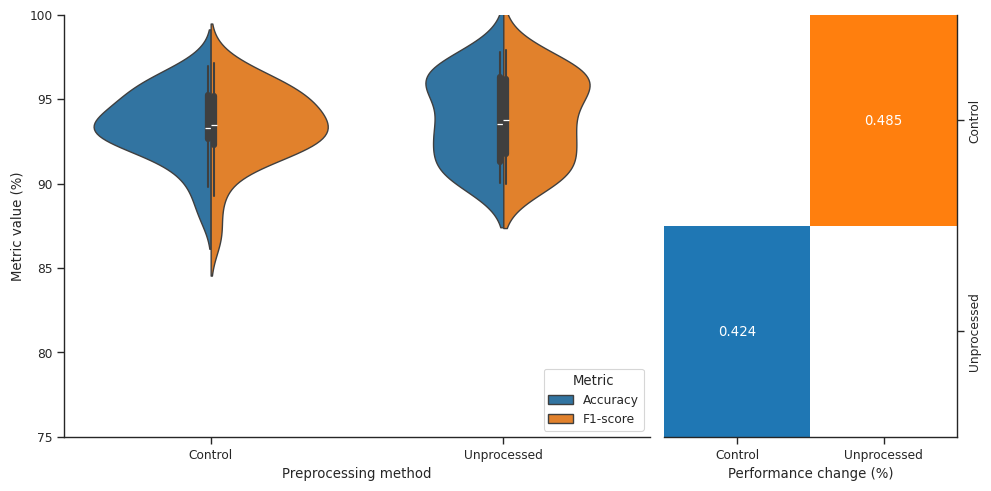

In [22]:
print(generate_table(pre_accs, pre_f1s, pre_categories))
plot_performance(
    pre_accs,
    pre_f1s,
    pre_categories,
    "Preprocessing method",
    ylim=(75, 100),
)

#### Sampling frequency

In [23]:
sf_accs = []
sf_f1s = []
sf_categories = ["CNN-100", "CNN-500", "GRU-100", "GRU-500"]

# cnn 100
sf_accs.append(
    [
        0.8778173190984578,
        0.8505747126436781,
        0.8903614457831325,
        0.8361858190709046,
        0.901863354037267,
        0.8866103739445115,
        0.8556566970091027,
        0.8702830188679245,
        0.9361948955916474,
        0.8529769137302552,
        0.9105793450881612,
        0.8856088560885609,
        0.8545034642032333,
        0.8515850144092219,
        0.9140811455847255,
        0.9425901201602136,
        0.8436317780580076,
        0.871007371007371,
        0.9305177111716622,
        0.8982412060301508,
        0.9089790897908979,
        0.8913043478260869,
        0.8978562421185372,
        0.8143236074270557,
        0.8844282238442822,
    ]
)

sf_f1s.append(
    [
        0.8835294042582295,
        0.8434259576764486,
        0.8865009361666598,
        0.8396814694829328,
        0.9076672360976128,
        0.8938892497521496,
        0.8580407259180951,
        0.8613641027901272,
        0.9329667870669637,
        0.8518887179778225,
        0.9145815607244477,
        0.8870741851346942,
        0.8616304079348331,
        0.8552383825812481,
        0.9137691046509782,
        0.9430870537887216,
        0.8442752153426527,
        0.8708750075153233,
        0.9306251491431011,
        0.9000594562269637,
        0.907752201485518,
        0.891211745564416,
        0.8988642441050463,
        0.8240510991480738,
        0.885644096082576,
    ]
)

# cnn 500
sf_accs.append(
    [
        0.9216589861751152,
        0.8808664259927798,
        0.9075829383886256,
        0.8801054018445322,
        0.9236453201970444,
        0.8846625766871166,
        0.9055627425614489,
        0.8899188876013905,
        0.9553990610328639,
        0.8981132075471698,
        0.9474342928660826,
        0.9015990159901599,
        0.9073856975381008,
        0.9047619047619048,
        0.948905109489051,
        0.9238095238095239,
        0.8944174757281553,
        0.9074733096085409,
        0.9444444444444444,
        0.9098765432098765,
        0.9543080939947781,
        0.8989037758830695,
        0.9,
        0.8888888888888888,
        0.8990267639902676,
    ]
)
sf_f1s.append(
    [
        0.9225178901171512,
        0.8734550143551567,
        0.9004143684634609,
        0.8784079821724742,
        0.9263169057093907,
        0.8892612926678604,
        0.9028149468922129,
        0.8792682570679474,
        0.95133506997518,
        0.8967016103527513,
        0.9458426853383972,
        0.9016775636198426,
        0.9081153743827037,
        0.9015676970144014,
        0.947394630975861,
        0.9195878576044784,
        0.8912216176895444,
        0.9056589241542401,
        0.9414409042346297,
        0.9087975901560025,
        0.9523184408210428,
        0.9000719846635146,
        0.8971648392256316,
        0.8867887972619666,
        0.8982777022221147,
    ]
)

# gru 100
sf_accs.append(
    [
        0.8849347568208779,
        0.8569604086845466,
        0.9108433734939759,
        0.8251833740831296,
        0.901863354037267,
        0.8757539203860072,
        0.8439531859557867,
        0.8608490566037735,
        0.9245939675174014,
        0.8869987849331713,
        0.9181360201511335,
        0.9298892988929889,
        0.8498845265588915,
        0.8587896253602305,
        0.9176610978520287,
        0.9332443257676902,
        0.8915510718789408,
        0.9017199017199017,
        0.9359673024523161,
        0.9271356783919598,
        0.9175891758917589,
        0.8961352657004831,
        0.8953341740226987,
        0.8607427055702918,
        0.8941605839416058,
    ]
)

sf_f1s.append(
    [
        0.8924990050020559,
        0.8505354966222937,
        0.9100565835677958,
        0.8290995534059272,
        0.9048583815193949,
        0.8828986471885989,
        0.8451520388956398,
        0.8515605182305119,
        0.922556843553753,
        0.8879908119817623,
        0.9223143860128706,
        0.9326764702636918,
        0.8586057304207205,
        0.8632530011831305,
        0.9164850539857771,
        0.932663282270471,
        0.8951629549138154,
        0.9077748086232027,
        0.9363798505043557,
        0.9294770713837558,
        0.9197052524054221,
        0.8986464690361633,
        0.896542977569599,
        0.8647955627311337,
        0.8938593060604447,
    ]
)

# gru 500
sf_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)
sf_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)
sf_accs = [
    [acc * 100 for acc in sublist]
    for sublist in sf_accs
]
sf_f1s = [
    [f1 * 100 for f1 in sublist]
    for sublist in sf_f1s
]


\begin{table}[H]
  \centering
  \begin{tabular}{@{}lll@{}} \toprule
      & Accuracy             & F1-Score             \\ \midrule
  CNN-100 & 88.23\% (SD 3.18) & 88.35\% (SD 3.11) \\
  CNN-500 & 91.12\% (SD 2.25) & 90.91\% (SD 2.29) \\
  GRU-100 & 89.20\% (SD 3.04) & 89.38\% (SD 3.03) \\
  GRU-500 & 93.47\% (SD 2.01) & 93.39\% (SD 2.20) \\ \bottomrule
  \end{tabular}
  \caption{CAPTION HERE}
\end{table}
  category    metric      value
0  CNN-100  Accuracy  88.231048
1  CNN-500  Accuracy  91.115002
2  GRU-100  Accuracy  89.199500
3  GRU-500  Accuracy  93.473672
4  CNN-100  F1-score  88.350774
5  CNN-500  F1-score  90.905680
6  GRU-100  F1-score  89.382200
7  GRU-500  F1-score  93.394063


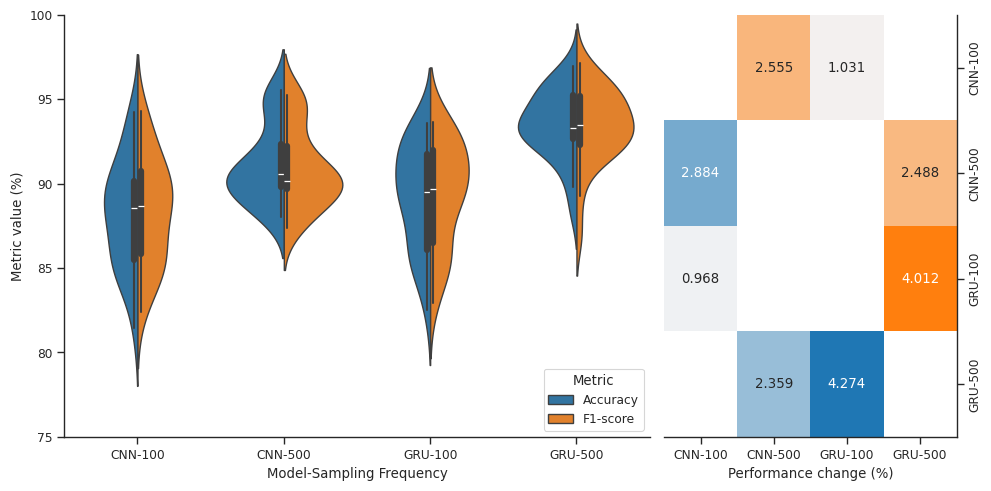

In [25]:
print(generate_table(sf_accs, sf_f1s, sf_categories))
plot_performance(
    sf_accs,
    sf_f1s,
    sf_categories,
    "Model-Sampling Frequency",
    ylim=(75, 100),
)

#### Formulation

In [10]:
form_accs = []
form_f1s = []

form_categories = ["Control", "Topological", "Topological+Conv"]

# Base
form_accs.append(
    [
        0.8778173190984578,
        0.8505747126436781,
        0.8903614457831325,
        0.8361858190709046,
        0.901863354037267,
        0.8866103739445115,
        0.8556566970091027,
        0.8702830188679245,
        0.9361948955916474,
        0.8529769137302552,
        0.9105793450881612,
        0.8856088560885609,
        0.8545034642032333,
        0.8515850144092219,
        0.9140811455847255,
        0.9425901201602136,
        0.8436317780580076,
        0.871007371007371,
        0.9305177111716622,
        0.8982412060301508,
        0.9089790897908979,
        0.8913043478260869,
        0.8978562421185372,
        0.8143236074270557,
        0.8844282238442822,
    ]
)

form_f1s.append(
    [
        0.8835294042582295,
        0.8434259576764486,
        0.8865009361666598,
        0.8396814694829328,
        0.9076672360976128,
        0.8938892497521496,
        0.8580407259180951,
        0.8613641027901272,
        0.9329667870669637,
        0.8518887179778225,
        0.9145815607244477,
        0.8870741851346942,
        0.8616304079348331,
        0.8552383825812481,
        0.9137691046509782,
        0.9430870537887216,
        0.8442752153426527,
        0.8708750075153233,
        0.9306251491431011,
        0.9000594562269637,
        0.907752201485518,
        0.891211745564416,
        0.8988642441050463,
        0.8240510991480738,
        0.885644096082576,
    ]
)

# Topological model without topological conv
form_accs.append(
    [
        0.8730723606168446,
        0.8467432950191571,
        0.8819277108433735,
        0.8276283618581907,
        0.8993788819875776,
        0.8576598311218335,
        0.8699609882964889,
        0.8632075471698113,
        0.9303944315545244,
        0.8602673147023087,
        0.9181360201511335,
        0.8929889298892989,
        0.8533487297921478,
        0.8328530259365994,
        0.9128878281622912,
        0.9506008010680908,
        0.8461538461538461,
        0.8796068796068796,
        0.94141689373297,
        0.9183417085427136,
        0.915129151291513,
        0.8985507246376812,
        0.8991172761664565,
        0.8209549071618037,
        0.8722627737226277,
    ]
)

form_f1s.append(
    [
        0.8752059187277699,
        0.8368104288125229,
        0.878042552934993,
        0.8313430737090247,
        0.9040226665027232,
        0.8650495227726722,
        0.8700460248859507,
        0.8540202058360524,
        0.928218576912121,
        0.8629758777724792,
        0.9212666424038432,
        0.894872717346528,
        0.8614848861298086,
        0.8354121977309392,
        0.9118292347476198,
        0.9511990803091033,
        0.8477848529680088,
        0.8840086744791755,
        0.9413983827103791,
        0.9185811715239087,
        0.9170975258857027,
        0.89703304547013,
        0.9008274156191616,
        0.8271030262889946,
        0.8725946189148631,
    ]
)

# Topological model with topological conv
form_accs.append(
    [
        0.8529062870699882,
        0.8045977011494253,
        0.8746987951807229,
        0.80440097799511,
        0.901863354037267,
        0.8685162846803377,
        0.8192457737321196,
        0.8561320754716981,
        0.9164733178654292,
        0.8493317132442284,
        0.8954659949622166,
        0.9028290282902829,
        0.8441108545034642,
        0.792507204610951,
        0.9152744630071599,
        0.9279038718291055,
        0.819672131147541,
        0.8869778869778869,
        0.9128065395095368,
        0.8919597989949749,
        0.8929889298892989,
        0.8864734299516909,
        0.8738965952080706,
        0.8037135278514589,
        0.8637469586374696,
    ]
)

form_f1s.append(
    [
        0.8572699060987196,
        0.7924727725167623,
        0.8745469120466929,
        0.8117391466698638,
        0.9067120705977458,
        0.8754482489128392,
        0.8213153750182958,
        0.8515519393480158,
        0.9166380668732813,
        0.8493807816606601,
        0.8982151516897364,
        0.9039070627201038,
        0.8537635642098117,
        0.7902288763532856,
        0.9160527411836753,
        0.928234819421277,
        0.82379489171684,
        0.8886404272508516,
        0.9119645959472708,
        0.8955307300294233,
        0.8921635958144487,
        0.8899840519241472,
        0.8776765430785861,
        0.8135273165589891,
        0.8667782307678881,
    ]
)

           category    metric     value
0           Control  Accuracy  0.882310
1       Topological  Accuracy  0.882504
2  Topological+Conv  Accuracy  0.866340
3           Control  F1-score  0.883508
4       Topological  F1-score  0.883529
5  Topological+Conv  F1-score  0.868302


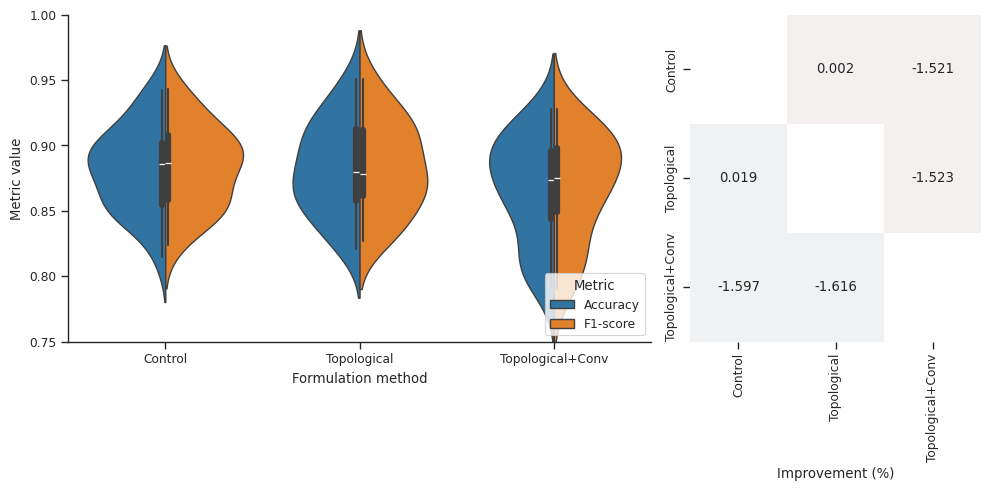

In [11]:
plot_performance(
    form_accs, form_f1s, form_categories, "Formulation method", ylim=(0.75, 1)
)